In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=60, random_state=28, centers=2, cluster_std=2, shuffle=False, n_features=2)

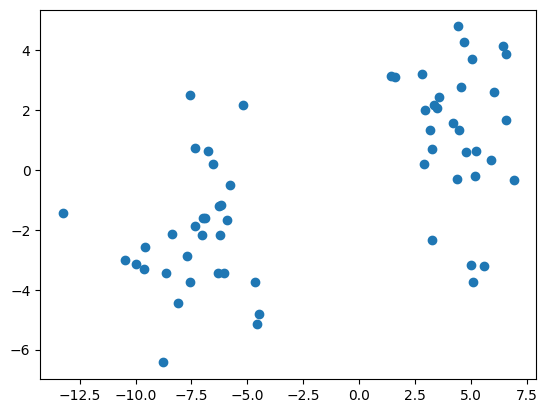

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [20]:
import numpy as np

def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [21]:
from scipy.cluster.hierarchy import fcluster, linkage

mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[-7.33262926, -2.16552445],
       [ 4.441792  ,  1.30677524]])

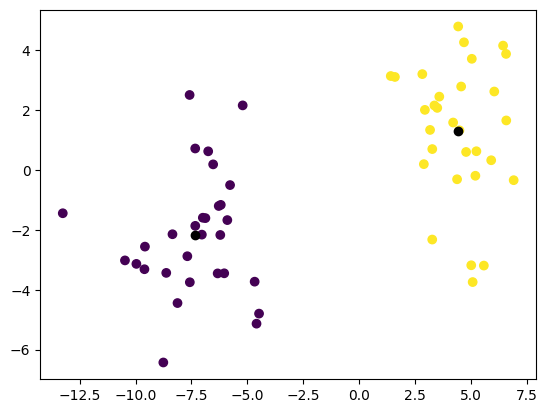

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='black')

In [23]:
import math


class KohonenNetwork:
    def __init__(self, attribute_size, c):
        self.c = c
        self.a = [0.7 for _ in range(attribute_size)]

    def calculate_a(self, i):
        return (50 - i) / 100

    ## Определяем победителя
    def winner(self, weights, sample):
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1
        
    def print_statistics(self, i, weights):
        print(f'\nШаг для {i} кластера = {self.a[i]}')
        print(f'Веса после обновления:')
        print(weights)    

    ## Процесс обучения
    def update(self, weights, sample, j, step):
        for i in range(len(weights)):
            self.a[j] = self.calculate_a(step)
            weights[j][i] = weights[j][i] + self.a[j] * (sample[i] - weights[j][i])
            
        self.print_statistics(j, weights)

        return weights

In [24]:
np.random.shuffle(X)
T = X
sample_size, attr_size = len(T), len(T[0])

c = 2

weights = np.random.normal(100, 10, size=(attr_size, c)) / 100
weights

array([[1.05984092, 1.1225035 ],
       [1.07030657, 0.9968002 ]])

In [25]:
network = KohonenNetwork(attr_size, c)

In [26]:
for i in range(sample_size):
    sample = T[i]
    winner = network.winner(weights, sample)
    weights = network.update(weights, sample, winner, i)


Шаг для 1 кластера = 0.5
Веса после обновления:
[[1.05984092 1.1225035 ]
 [2.3321779  1.71932699]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[3.70027923 2.60329958]
 [2.3321779  1.71932699]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[-1.37471447  0.58054896]
 [ 2.3321779   1.71932699]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[-1.37471447  0.58054896]
 [-2.20840818  1.24568266]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[-1.37471447  0.58054896]
 [ 0.31607848  0.99115525]]

Шаг для 0 кластера = 0.45
Веса после обновления:
[[-0.0326055   1.7135605 ]
 [ 0.31607848  0.99115525]]

Шаг для 0 кластера = 0.44
Веса после обновления:
[[-1.98600884 -1.15104353]
 [ 0.31607848  0.99115525]]

Шаг для 0 кластера = 0.43
Веса после обновления:
[[1.47136147 0.46728764]
 [0.31607848 0.99115525]]

Шаг для 0 кластера = 0.42
Веса после обновления:
[[-1.80278159 -1.18040861]
 [ 0.31607848  0.99115525]]

Шаг для 1 кластера = 0.41
Веса после обновления:
[[-1.80278159 -1.1

In [27]:
print("Обученные веса: ")
print(weights)

Обученные веса: 
[[ 1.42934917  0.41918069]
 [-1.72354456 -0.49439992]]


In [28]:
predicted = np.array([network.winner(weights, s) for s in X])
predicted

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [29]:
print('Совпадают ли результаты нейронной сети с реальными данными:')
y == predicted

Совпадают ли результаты нейронной сети с реальными данными:


array([False, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False,  True, False, False,  True])

In [30]:
from sklearn.metrics import accuracy_score

print(f'Точность нейронной сети: {accuracy_score(y, predicted) * 100}%')

Точность нейронной сети: 53.333333333333336%
